# Hippocampus Neurogenesis Toy Model

In [1]:
from ipywidgets import interact
import numpy as np
import scipy as sp
import scipy.integrate

import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn
seaborn.set_context('notebook')

In [119]:
def func(N, t0, p):
    r111 = sp.log(2) / p['Tc1'] * p['alpha1']
    r122 = sp.log(2) / p['Tc1'] * p['beta1']
    r112 = sp.log(2) / p['Tc1'] * (1 - p['alpha1'] - p['beta1'])
    r1loss = r111 - r122 - p['r12']
    r222 = sp.log(2) / p['Tc2'] * p['alpha2']
    r2loss = (2 * r122 + r112 + p['r12']) * p['N1tot_0'] / p['N2tot_0'] + r222
    
    
    dN0dt = (r111 - r122 - p['r12'] - r1loss) * N[0]
    dN1dt = (2 * r122 + r112 + p['r12']) * N[0] + (r222 - r2loss) * N[1]
    return sp.array([dN0dt, dN1dt])

In [120]:
def solve_ode(p):
    t = sp.linspace(p['t_min'], p['t_max'], 100)
    
    N0tot = sp.array([p['N1tot_0'], p['N2tot_0']])
    f = sp.array([p['f1'], p['f2']])
    N0 = (1.0 - f) * N0tot
    l0 = f * N0tot
    
    N = sp.integrate.odeint(func, N0, t, args = (p,))
    N1, N2 = N[:,0], N[:,1]
    l = sp.integrate.odeint(func, l0, t, args = (p,))
    l1, l2 = l[:,0], l[:,1]
    return t, N1, N2, l1, l2

In [145]:
p = dict(t_min = 0.0,
         t_max = 1.0,
         
         Tc1 = 1.0,
         alpha1 = 0.5,
         beta1 = 0.2,
         r12 = 0.2,
         
         Tc2 = 1.0,
         alpha2 = 0.5,
         
         N1tot_0 = 1000,
         N2tot_0 = 500,
         f1 = 0.5,
         f2 = 0.1,
        )

In [146]:
def plot_cell_numbers(**keyw):
    p.update(keyw)
    t, N1, N2, l1, l2 = solve_ode(p)
    
    lNtot1[0].set_data(t, N1 + l1)
    lNtot2[0].set_data(t, N2 + l2)
    lratio1[0].set_data(t, l1 / (N1 + l1))
    lratio2[0].set_data(t, l2 / (N2 + l2))
    lN1[0].set_data(t, N1)
    lN2[0].set_data(t, N2)
    ll1[0].set_data(t, l1)
    ll2[0].set_data(t, l2)
    
    ax[1,1].set_xlim(p['t_min'], p['t_max'])

In [147]:
t, N1, N2, l1, l2 = solve_ode(p)

<IPython.core.display.Javascript object>


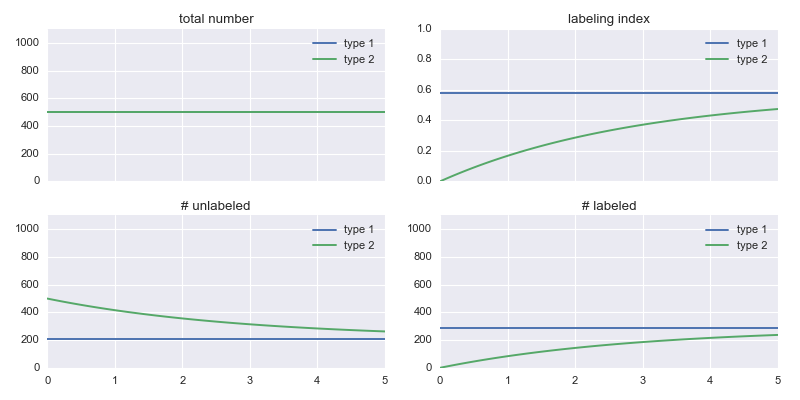

In [148]:
fig, ax = plt.subplots(2, 2, figsize = (10,5), sharex = True)

lNtot1 = ax[0, 0].plot(t, N1 + l1, label = 'type 1')
lNtot2 = ax[0, 0].plot(t, N2 + l2, label = 'type 2')

ax[0, 0].legend()
ax[0, 0].set_title('total number')

lratio1 = ax[0, 1].plot(t, l1 / (N1 + l1), label = 'type 1')
lratio2 = ax[0, 1].plot(t, l2 / (N2 + l2), label = 'type 2')

ax[0, 1].legend()
ax[0, 1].set_title('labeling index')
ax[0, 1].set_ylim(0, 1)

lN1 = ax[1, 0].plot(t, N1, label = 'type 1')
lN2 = ax[1, 0].plot(t, N2, label = 'type 2')

ax[1, 0].legend()
ax[1, 0].set_title('# unlabeled')

ll1 = ax[1, 1].plot(t, l1, label = 'type 1')
ll2 = ax[1, 1].plot(t, l2, label = 'type 2')

ax[1, 1].legend()
ax[1, 1].set_title('# labeled')

for cax in [ax[0, 0], ax[1, 0], ax[1, 1]]:
    cax.set_ylim(0, 1.1 * max(p['N1tot_0'], p['N2tot_0']))


plt.tight_layout()
plt.show()

In [149]:
interact(plot_cell_numbers, t_max = (0.1, 10, 0.1), Tc1 = (0, 10, 0.1), alpha1 = (0, 1, 0.01), beta1 = (0, 1, 0.01), Tc2 = (0, 10, 0.1), alpha2 = (0, 1, 0.01), N1tot_0 = (0, 1000, 0.1), N2tot_0 = (0, 1000, 0.1), f1 = (0, 1, 0.01), f2 = (0, 1, 0.01));

In [ ]:
p = dict(t_min = 0.0,
         t_max = 1.0,
         
         Tc1 = 1.0,
         alpha1 = 0.5,
         beta1 = 0.2,
         r12 = 0.2,
         
         Tc2 = 1.0,
         alpha2 = 0.5,
         r2loss = 10.0,
         
         N1tot_0 = 1000,
         f1 = 0.5,
         f2 = 0.1,
        )